In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))

In [2]:
import json
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [3]:
profese = seznamy["profese"]

In [4]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

In [48]:
df["Lidé"] = df[profese].values.tolist()
df["Lidé"] = df["Lidé"].apply(lambda x: plose_jednoduse(x))

AttributeError: 'numpy.ndarray' object has no attribute 'drop_duplicates'

In [6]:
df["Počet lidí"] = df["Lidé"].apply(lambda x: len(x))

In [7]:
df[["Film","Počet lidí"]].sort_values("Počet lidí",ascending=False).head(10)

,Film,Počet lidí
2701,Temné slunce (397277),479
4373,Nabarvené ptáče (401962),406
2513,Osvobození Prahy (397108),344
2815,Putování Jana Amose (397429),344
2383,Dny zrady (396979),344
4348,Králíček Jojo (402171),279
2393,Hvězda padá vzhůru (397037),274
4380,Skleněný pokoj (401929),272
2634,Lásky mezi kapkami deště (397232),271
3867,Colette (400571),264


## První profese

In [8]:
prvni_profese = {}
for p in profese:
    prvni_profese[p] = df.explode(p).groupby(p)["Copyright"].min().min()
prvni_profese = pd.DataFrame.from_dict(prvni_profese, orient="index", columns=["Rok"]).sort_values(by="Rok")
prvni_profese

,Rok
Režie,1898
Původní filmový námět,1898
Kamera,1898
Hrají,1898
Účinkují,1901
Spolupráce,1902
Scénář,1910
Druhá kamera,1913
Architekt,1914
Výtvarník,1918


## Režie

### Délka kariéry a produktivita

In [9]:
rezie = df.explode("Režie").explode("Typologie")

In [10]:
rezie = rezie.replace({"neuvedeno": None})

In [11]:
rezie[rezie["Délka"] == "dlouhometrážní"].groupby("Režie")["Film"].nunique().nlargest(10)

Režie
Martin Frič (20324)           85
Miroslav Cikán (31969)        48
Karel Kachyňa (3526)          47
Vladimír Slavínský (31967)    47
Otakar Vávra (9507)           45
Karel Lamač (37847)           37
Svatopluk Innemann (33860)    36
Václav Kubásek (37286)        35
Václav Binovec (37467)        29
Vladimír Čech (7871)          27
Name: Film, dtype: int64

In [12]:
rezie.groupby(["Typologie","Režie"])["Film"].nunique().nlargest(10)

Typologie    Režie                     
distribuční  Martin Frič (20324)           88
hraný        Martin Frič (20324)           86
distribuční  Otakar Vávra (9507)           56
             Vladimír Slavínský (31967)    51
hraný        Vladimír Slavínský (31967)    51
distribuční  Miroslav Cikán (31969)        49
             Václav Binovec (37467)        49
hraný        Miroslav Cikán (31969)        49
             Václav Binovec (37467)        49
distribuční  Karel Kachyňa (3526)          47
Name: Film, dtype: int64

In [49]:
pd.Series(rezie.groupby("Režie")["Copyright"].max() - rezie.groupby("Režie")["Copyright"].min()).nlargest(15)

Režie
Břetislav Pojar (3113)       60
Karel Vachek (565)           59
Otakar Vávra (9507)          59
Hermína Týrlová (4754)       58
Václav Vorlíček (1044)       57
Jan Němec (3041)             56
Dušan Klein (2568)           55
Jiří Menzel (7887)           52
Agnieszka Holland (12106)    51
Jan Švankmajer (406)         50
Karel Kachyňa (3526)         50
Vojtěch Jasný (4666)         50
Rajko Grlić (80991)          47
Věra Chytilová (1555)        47
František Filip (7822)       46
Name: Copyright, dtype: int64

In [14]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [15]:
rezie = rezie.merge(persony, left_on="Režie", right_on="Jméno")

In [16]:
rezie["Věk"] = rezie["Copyright"] - rezie["Rok narození"]

In [17]:
rezie[rezie["Délka"] == "dlouhometrážní"].groupby("Režie")["Věk"].max().nlargest()

Režie
Břetislav Pojar (3113)    88.0
Jan Švankmajer (406)      84.0
Karel Steklý (35894)      82.0
Václav Vorlíček (1044)    81.0
Jan Němec (3041)          80.0
Name: Věk, dtype: float64

In [18]:
rezie[rezie["Délka"] == "dlouhometrážní"].groupby("Režie")["Věk"].min().nlargest()

Režie
Václav Havel (676)           75.0
Roman Polanski (22697)       72.0
Jiří Adamec (28467)          71.0
Lev Golub (54110)            71.0
José Maria Forqué (79377)    70.0
Name: Věk, dtype: float64

In [19]:
rezie[(rezie["Typologie"] == "hraný") & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Věk"].min().nsmallest()

Režie
Matěj Chlupáček (86730)    18.0
David Balda (65707)        19.0
Radim Špaček (496)         22.0
Tomáš Řehořek (20771)      22.0
Eman Fiala (64088)         23.0
Name: Věk, dtype: float64

<AxesSubplot:xlabel='Copyright'>

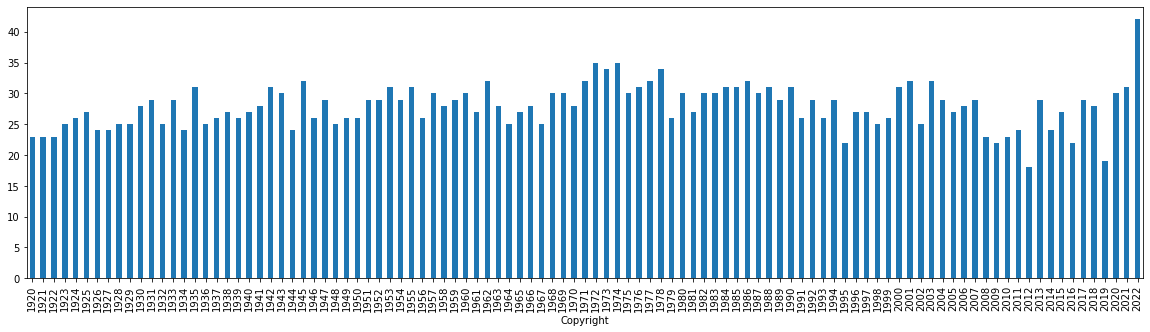

In [20]:
rezie[(rezie["Typologie"] == "hraný") & (rezie["Délka"] == "dlouhometrážní")].groupby("Copyright")["Věk"].min().plot.bar(figsize=(20,5))

### Režie: další pikošky

In [21]:
odrezirovano = pd.Series(rezie.groupby("Režie")["Film"].nunique(), name="Odrežírováno")

In [22]:
rezie = rezie.merge(odrezirovano, on="Režie")

In [23]:
rezie[(rezie["Odrežírováno"] >= 10) & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Počet lidí"].mean().nlargest(10)

Režie
Ladislav Rychman (7892)     124.181818
Tomáš Vorel (106)           120.833333
Václav Matějka (29527)      114.642857
Oldřich Lipský (7883)       114.380952
K. M. Walló (51350)         107.166667
Jan Svěrák (476)            104.200000
Juraj Herz (7875)           104.058824
Karel Janák (16647)         103.125000
Otakar Vávra (9507)         101.511111
Zdeněk Podskalský (4749)     99.444444
Name: Počet lidí, dtype: float64

In [24]:
rezie[(rezie["Odrežírováno"] >= 10) & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Počet lidí"].median().nlargest(10)

Režie
Tomáš Vorel (106)          119.0
Václav Matějka (29527)     110.5
Jan Svěrák (476)           108.0
K. M. Walló (51350)        107.5
Karel Janák (16647)        105.5
Oldřich Lipský (7883)      105.0
Ladislav Rychman (7892)    102.0
Juraj Herz (7875)           99.0
Zdeněk Troška (3874)        96.0
Karel Steklý (35894)        91.5
Name: Počet lidí, dtype: float64

In [25]:
rezie.explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)        1993
Karel Kachyňa (3526)       1288
Oldřich Lipský (7883)      1114
Karel Steklý (35894)       1079
Zdeněk Troška (3874)        993
Martin Frič (20324)         969
Juraj Herz (7875)           958
Dušan Klein (2568)          942
Václav Vorlíček (1044)      928
Ladislav Rychman (7892)     913
Name: Hrají, dtype: int64

In [26]:
nejobsazovanejsi = df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(500).index.to_list()
df_nejobsazovanejsi = df.explode("Hrají")
df_nejobsazovanejsi = df_nejobsazovanejsi[df_nejobsazovanejsi["Hrají"].isin(nejobsazovanejsi)]
df_nejobsazovanejsi.explode("Režie").groupby("Režie")["Hrají"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)         329
Martin Frič (20324)         286
Karel Steklý (35894)        285
Karel Kachyňa (3526)        236
Oldřich Lipský (7883)       234
Ivo Novák (7889)            229
Josef Mach (7885)           229
Vladimír Čech (7871)        229
Václav Vorlíček (1044)      228
Zdeněk Podskalský (4749)    218
Name: Hrají, dtype: int64

In [27]:
df.explode("Režie").explode("Žánr").groupby("Režie")["Žánr"].nunique().nlargest(10)

Režie
Martin Frič (20324)           26
Otakar Vávra (9507)           25
Věra Chytilová (1555)         23
Evald Schorm (7895)           22
Karel Kachyňa (3526)          19
F. A. Brabec (5610)           18
Jaromil Jireš (5317)          16
Svatopluk Innemann (33860)    16
Václav Vorlíček (1044)        16
neuvedeno                     16
Name: Žánr, dtype: int64

In [28]:
rezie.explode("Scénář").groupby("Režie")["Scénář"].nunique().nlargest(10)

Režie
Martin Frič (20324)           82
Tomáš Vorel (106)             57
Miroslav Cikán (31969)        42
Václav Binovec (37467)        42
Vladimír Čech (7871)          40
Svatopluk Innemann (33860)    36
Karel Lamač (37847)           31
Karel Kachyňa (3526)          30
Otakar Vávra (9507)           30
Oldřich Lipský (7883)         29
Name: Scénář, dtype: int64

In [29]:
rezie.explode("Kamera").groupby("Režie")["Kamera"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)         79
J. A. Holman (37290)        62
Michael Kocáb (9669)        38
David Sís (10869)           37
Martin Frič (20324)         32
Helena Třeštíková (709)     30
Miroslav Janek (536)        30
Vladimír Škultéty (7223)    30
Václav Kubásek (37286)      28
Pavel Abrahám (19039)       27
Name: Kamera, dtype: int64

In [30]:
rezie[rezie["Režie"] == "J. A. Holman"]["Kamera"].to_list()

[]

In [31]:
rezie[rezie["Režie"].str.contains("/ž/")]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby,Lidé,Počet lidí,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk,Odrežírováno


In [32]:
rezie[rezie["Režie"] == "Otakar Vávra"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby,Lidé,Počet lidí,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk,Odrežírováno


In [33]:
df.explode("Režie").explode("Dirigent").groupby("Režie")["Dirigent"].nunique().nlargest(10)

Režie
Jan Hřebejk (4831)       7
Petr Nikolaev (540)      6
Viktor Polesný (7797)    5
Dušan Klein (2568)       3
Filip Renč (558)         3
Jiří Vejdělek (24168)    3
Tomáš Vorel (106)        3
F. A. Brabec (5610)      2
Hynek Bočan (2947)       2
Jan Svěrák (476)         2
Name: Dirigent, dtype: int64

In [34]:
df.explode("Režie").explode("Střih").groupby("Režie")["Střih"].nunique().nlargest(10)

Režie
K. M. Walló (51350)          19
Břetislav Pojar (3113)       17
Karel Vachek (565)           17
David Čálek (495)            16
Tomáš Vorel (106)            13
Věra Chytilová (1555)        13
Karel Kachyňa (3526)         12
Milan Cieslar (3593)         12
Vlasta Pospíšilová (4386)    12
Radim Špaček (496)           11
Name: Střih, dtype: int64

In [35]:
df.explode("Režie").explode("Pomocná režie").groupby("Režie")["Pomocná režie"].nunique().nlargest(10)

Režie
K. M. Walló (51350)          25
Otakar Vávra (9507)          23
Agnieszka Holland (12106)    21
Karel Kachyňa (3526)         20
Pavel Abrahám (19039)        20
Jindřich Polák (7891)        18
Jaromil Jireš (5317)         17
Jiří Hanibal (7873)          17
Ivo Novák (7889)             15
Václav Matějka (29527)       15
Name: Pomocná režie, dtype: int64

In [36]:
df.explode("Kamera").explode("Hrají").groupby("Kamera")["Hrají"].nunique().nlargest(10)

Kamera
Vladimír Smutný (1772)    1733
Jaromír Šofr (4285)       1671
Josef Illík (12730)       1637
Jan Čuřík (4946)          1500
Jiří Macháně (11743)      1469
Ivan Šlapeta (2968)       1419
Josef Vaniš (9510)        1419
Jiří Macák (1725)         1389
Jan Stallich (126242)     1382
Viktor Růžička (10079)    1252
Name: Hrají, dtype: int64

In [37]:
kariery_reziseru = pd.Series(df.explode("Režie").groupby("Režie")["Copyright"].max() -df.explode("Režie").groupby("Režie")["Copyright"].min(), name="Kariéry režisérů")

In [38]:
kariery_reziseru.sort_values(ascending=False).nlargest(15)

Režie
Břetislav Pojar (3113)       60
Otakar Vávra (9507)          59
Karel Vachek (565)           59
Hermína Týrlová (4754)       58
Václav Vorlíček (1044)       57
Jan Němec (3041)             56
Dušan Klein (2568)           55
Jiří Menzel (7887)           52
Agnieszka Holland (12106)    51
Vojtěch Jasný (4666)         50
Karel Kachyňa (3526)         50
Jan Švankmajer (406)         50
Rajko Grlić (80991)          47
Věra Chytilová (1555)        47
František Filip (7822)       46
Name: Kariéry režisérů, dtype: int64

<AxesSubplot:ylabel='Frequency'>

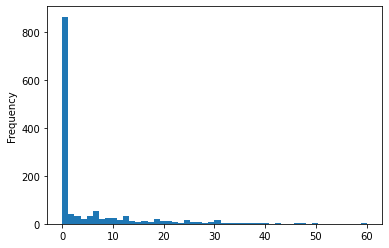

In [39]:
kariery_reziseru.plot.hist(bins=50)

In [40]:
df[(df["Copyright"] > 1918) & (df["Copyright"] < 1939)].explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(5)

Režie
Svatopluk Innemann (33860)    486
Martin Frič (20324)           473
Karel Lamač (37847)           379
Vladimír Slavínský (31967)    367
Václav Binovec (37467)        351
Name: Hrají, dtype: int64

In [41]:
df[(df["Copyright"] > 1918) & (df["Copyright"] < 1939)].explode("Režie").groupby("Režie")["Film"].nunique().nlargest(5)

Režie
neuvedeno                     129
Svatopluk Innemann (33860)     46
Karel Dodal (127380)           42
Karel Lamač (37847)            41
Martin Frič (20324)            41
Name: Film, dtype: int64

In [42]:
df[(df["Copyright"] >= 1939) & (df["Copyright"] <= 1944)].explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(5)

Režie
Miroslav Cikán (31969)        242
Martin Frič (20324)           240
Vladimír Slavínský (31967)    225
Otakar Vávra (9507)           189
František Čáp (13530)         183
Name: Hrají, dtype: int64

In [43]:
df[(df["Copyright"] >= 1939) & (df["Copyright"] <= 1944)].explode("Režie").groupby("Režie")["Film"].nunique().nlargest(5)

Režie
Martin Frič (20324)           19
Miroslav Cikán (31969)        17
Vladimír Slavínský (31967)    13
Otakar Vávra (9507)           12
František Čáp (13530)         10
Name: Film, dtype: int64

In [44]:
df[(df["Copyright"] >= 1945) & (df["Copyright"] <= 1989)].explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(5)

Režie
Otakar Vávra (9507)        1843
Karel Kachyňa (3526)       1173
Oldřich Lipský (7883)      1114
Karel Steklý (35894)       1074
Ladislav Rychman (7892)     913
Name: Hrají, dtype: int64

In [45]:
df[(df["Copyright"] >= 1945) & (df["Copyright"] <= 1989)].explode("Režie").groupby("Režie")["Film"].nunique().nlargest(5)

Režie
Karel Kachyňa (3526)      42
Hermína Týrlová (4754)    35
Otakar Vávra (9507)       34
Jindřich Polák (7891)     30
Martin Frič (20324)       28
Name: Film, dtype: int64

In [46]:
df[(df["Copyright"] > 1989)].explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(5)

Režie
Zdeněk Troška (3874)    807
Tomáš Vorel (106)       604
Jan Hřebejk (4831)      538
Jiří Chlumský (539)     457
Milan Cieslar (3593)    451
Name: Hrají, dtype: int64

In [47]:
df[(df["Copyright"] > 1989)].explode("Režie").groupby("Režie")["Film"].nunique().nlargest(5)

Režie
Jan Hřebejk (4831)         22
Zdeněk Troška (3874)       19
Helena Třeštíková (709)    12
Milan Cieslar (3593)       12
Miroslav Janek (536)       12
Name: Film, dtype: int64